next:

1. create a negative evidence conceptor that is -V{all gestures}, which should work as automatic segmentation

In [109]:
import cellbell
%pylab inline
import csv
import scipy as sp

Populating the interactive namespace from numpy and matplotlib


/Volumes/LocalDataHD/virtualenvs/env3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [110]:
logfiles = ["conceptors__171127_141748/conceptors__171127_141748_0_171127_141748.txt",
"conceptors__171127_141754/conceptors__171127_141754_0_171127_141754.txt",
"conceptors__171127_141800/conceptors__171127_141800_0_171127_141800.txt",
"conceptors__171127_141824/conceptors__171127_141824_0_171127_141824.txt",
"conceptors__171127_141830/conceptors__171127_141830_0_171127_141830.txt",
"conceptors__171127_141835/conceptors__171127_141835_0_171127_141835.txt",
"conceptors__171127_141839/conceptors__171127_141839_0_171127_141839.txt",
"conceptors__171127_141846/conceptors__171127_141846_0_171127_141846.txt",
"conceptors__171127_141854/conceptors__171127_141854_0_171127_141854.txt",
"conceptors__171127_141912/conceptors__171127_141912_0_171127_141912.txt",
"conceptors__171127_141923/conceptors__171127_141923_0_171127_141923.txt",
"conceptors__171127_141931/conceptors__171127_141931_0_171127_141931.txt",
"conceptors__171127_141936/conceptors__171127_141936_0_171127_141936.txt",
"conceptors__171127_141948/conceptors__171127_141948_0_171127_141948.txt",
"conceptors__171127_142005/conceptors__171127_142005_0_171127_142005.txt"
];

videofiles = [
"conceptors_171127_141729_0.avi",
"conceptors_171127_141729_1.avi",
"conceptors_171127_141729_2.avi",
"conceptors_171127_141814_0.avi",
"conceptors_171127_141814_1.avi",
"conceptors_171127_141814_2.avi",
"conceptors_171127_141814_3.avi",
"conceptors_171127_141814_4.avi",
"conceptors_171127_141814_5.avi",
"conceptors_171127_141814_6.avi",
"conceptors_171127_141814_7.avi",
"conceptors_171127_141814_8.avi",
"conceptors_171127_141814_9.avi",
"conceptors_171127_141814_10.avi",
"conceptors_171127_141814_11.avi"
];

In [111]:
gestureRanges = np.array([[10,50],[10,55],[0,40],[0,30],[0,35], [0,25], [0,32], [0,80],[0,118],[5,105],[0,30],[3,52],[1,50],[0,170],[0,95]])

In [112]:
dataRoot ='./data/acc_gestures/'
gestures = np.zeros(len(logfiles), dtype=np.object)
def loadGesture(idx):
    started = 0
    gesture = []
    with open(dataRoot + logfiles[idx], 'r') as csvfile:
        creader = csv.reader(csvfile, delimiter='\t', quotechar='\'')
        for row in creader:
            print(row[1])
            if (row[1] == '/videorec/record/start'):
                started = 1
                print("started")
            if started == 1:
                if(row[1] == '/minibee/data'):
                    print(row[8])
                    gesture = np.append(gesture, [float(row[8]), float(row[9]), float(row[10])])
    return 2*(gesture - 0.5)

for i in arange(len(logfiles)):
    gestures[i] = loadGesture(i) 
    gestures[i] = gestures[i].reshape((int(gestures[i].shape[0]/3)),3)

maxScale = np.max([np.max(abs(x)) for x in gestures])
print("Max:",maxScale)
gestures = gestures/maxScale

for i in arange(len(gestures)):
    gestures[i] = gestures[i][gestureRanges[i][0]:gestureRanges[i][1]]


/minibee/data
/videorec/record/start
started
/minibee/data
0.50445610284805
/videorec/frame
/minibee/data
0.50445610284805
/videorec/frame
/minibee/data
0.5050665140152
/videorec/frame
/videorec/frame
/minibee/data
0.5047003030777
/videorec/frame
/minibee/data
0.50408983230591
/videorec/frame
/minibee/data
0.50421196222305
/videorec/frame
/minibee/data
0.50445610284805
/videorec/frame
/minibee/data
0.50445610284805
/videorec/frame
/minibee/data
0.50457817316055
/videorec/frame
/minibee/data
0.50433403253555
/videorec/frame
/minibee/data
0.50445610284805
/videorec/frame
/minibee/data
0.5050665140152
/videorec/frame
/minibee/data
0.50579905509949
/videorec/frame
/minibee/data
0.50616532564163
/videorec/frame
/minibee/data
0.50543278455734
/videorec/frame
/minibee/data
0.50335735082626
/videorec/frame
/minibee/data
0.50079357624054
/videorec/frame
/minibee/data
0.50018310546875
/videorec/frame
/minibee/data
0.50018310546875
/videorec/frame
/minibee/data
0.49981686472893
/videorec/frame
/m

0.50677573680878
/minibee/data
0.50677573680878
/videorec/frame
/minibee/data
0.50299108028412
/videorec/frame
/minibee/data
0.50518864393234
/minibee/data
0.50567698478699
/videorec/frame
/minibee/data
0.5049444437027
/videorec/frame
/minibee/data
0.50433403253555
/videorec/frame
/minibee/data
0.50457817316055
/videorec/frame
/minibee/data
0.5050665140152
/minibee/data
0.50531071424484
/videorec/frame
/minibee/data
0.5047003030777
/videorec/frame
/minibee/data
0.50457817316055
/videorec/frame
/minibee/data
0.50457817316055
/videorec/frame
/minibee/data
0.5047003030777
/videorec/frame
/minibee/data
0.50457817316055
/videorec/frame
/minibee/data
0.5047003030777
/videorec/frame
/minibee/data
0.5047003030777
/videorec/frame
/minibee/data
0.50518864393234
/videorec/frame
/minibee/data
0.5050665140152
/videorec/frame
/minibee/data
0.50457817316055
/videorec/frame
/minibee/data
0.50457817316055
/videorec/frame
/minibee/data
0.5047003030777
/videorec/frame
/videorec/frame
/minibee/data
0.5047

/Volumes/LocalDataHD/virtualenvs/env3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


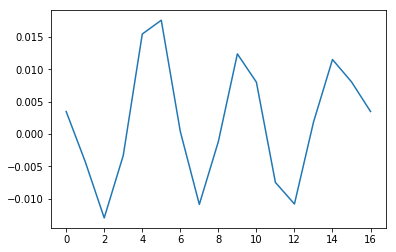

In [132]:
plot(np.fft.rfft(gestures[0][:,0][8:16],32))

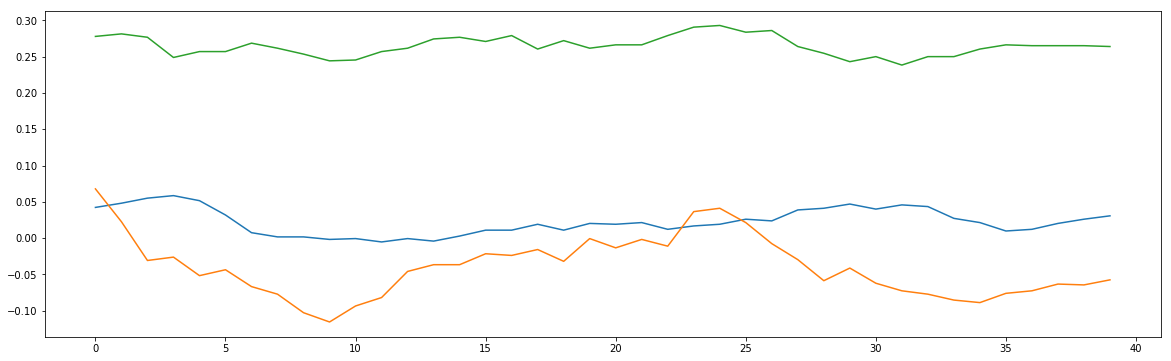

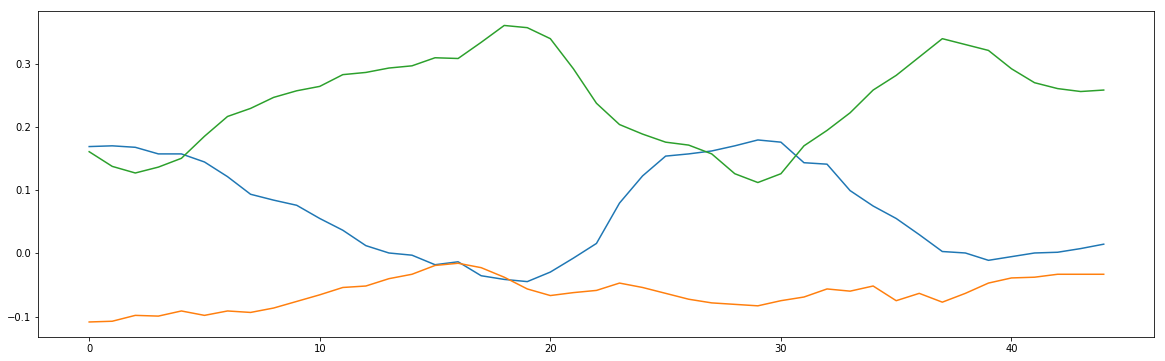

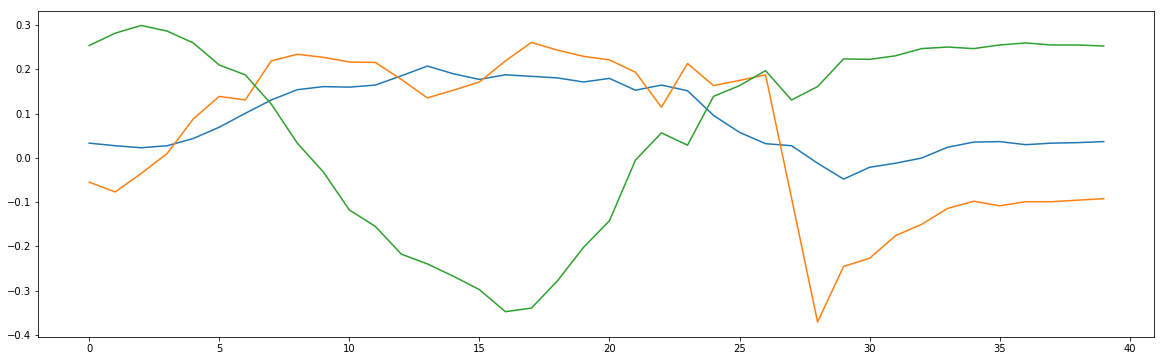

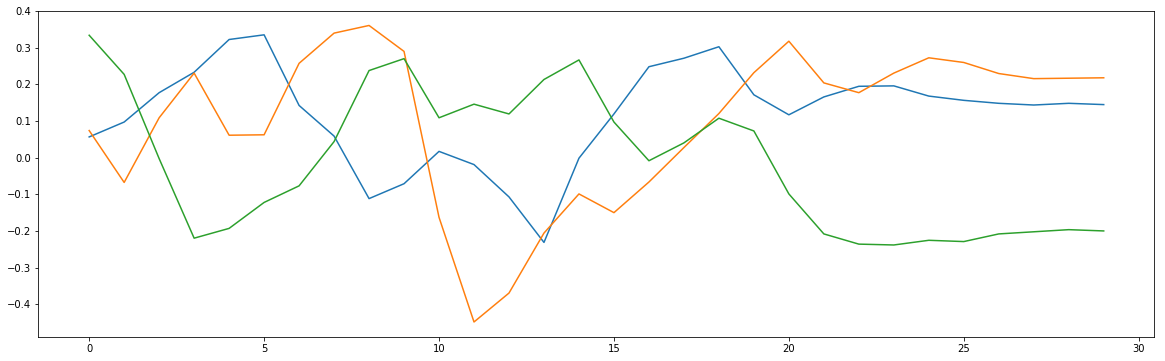

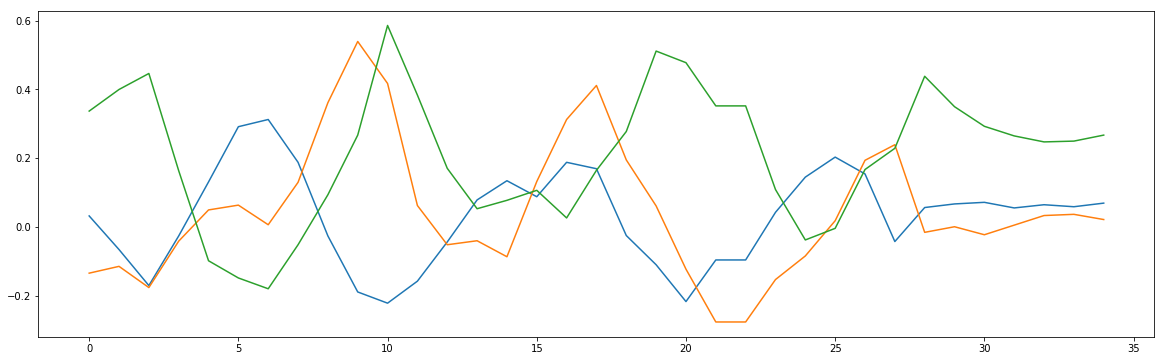

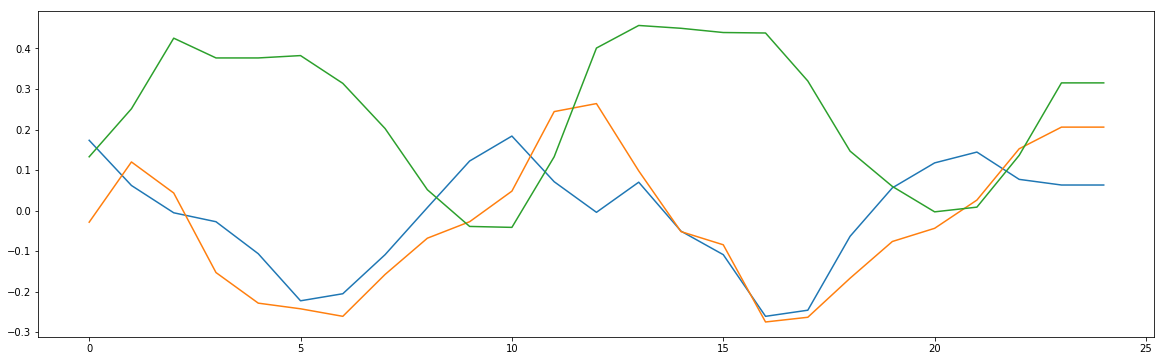

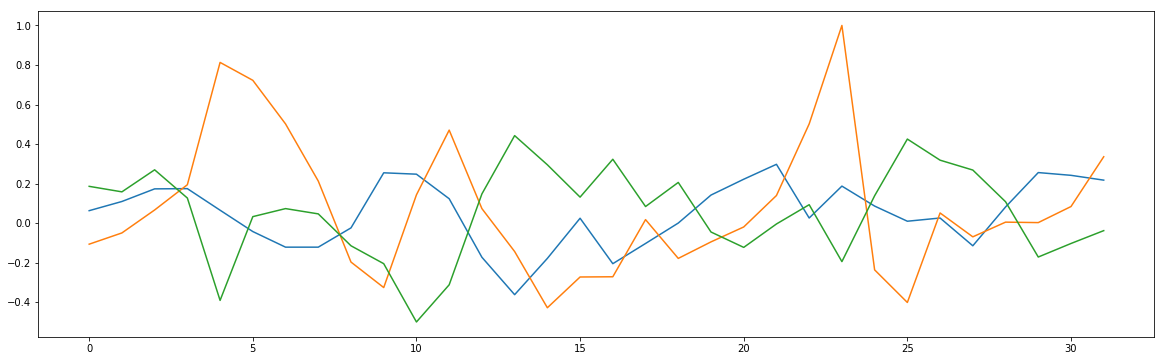

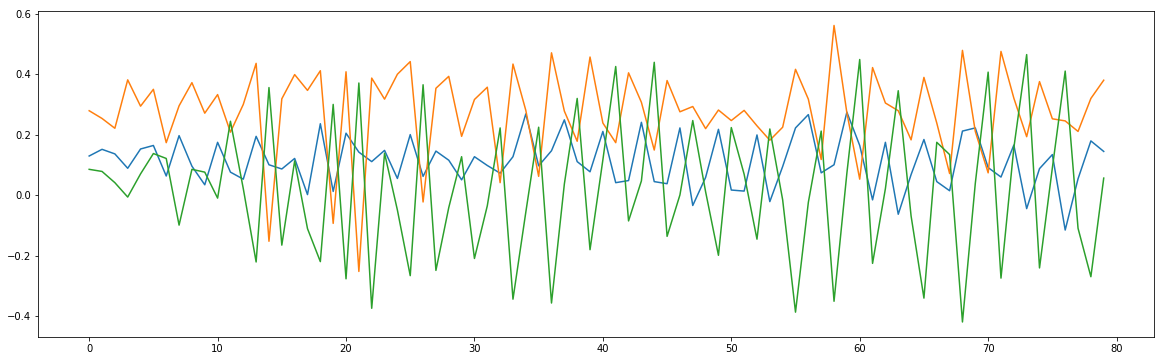

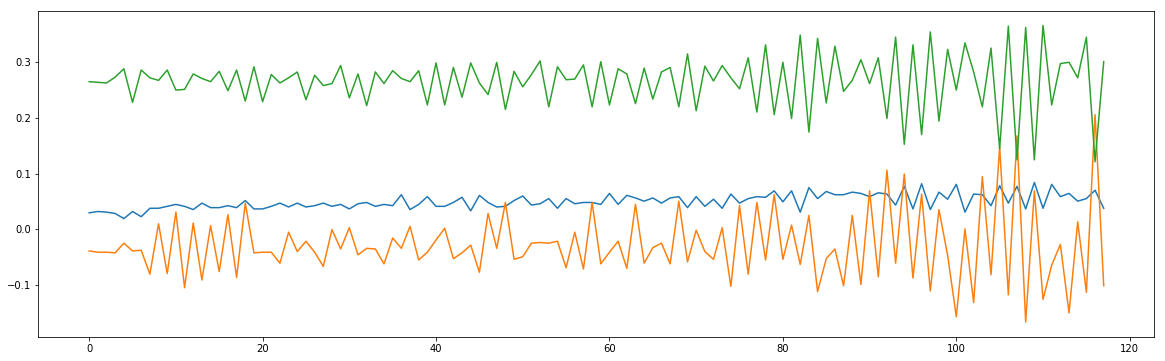

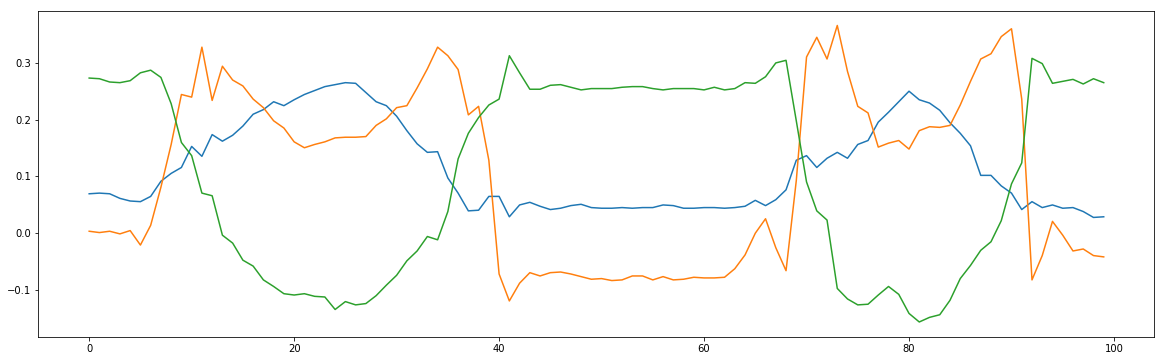

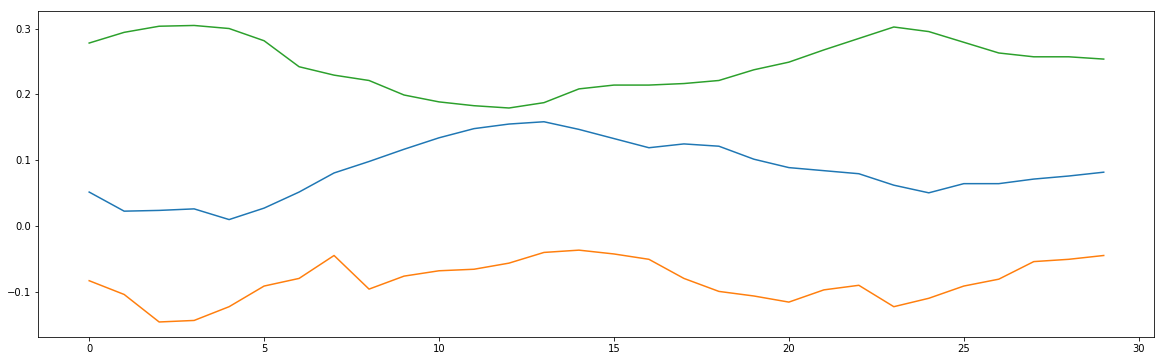

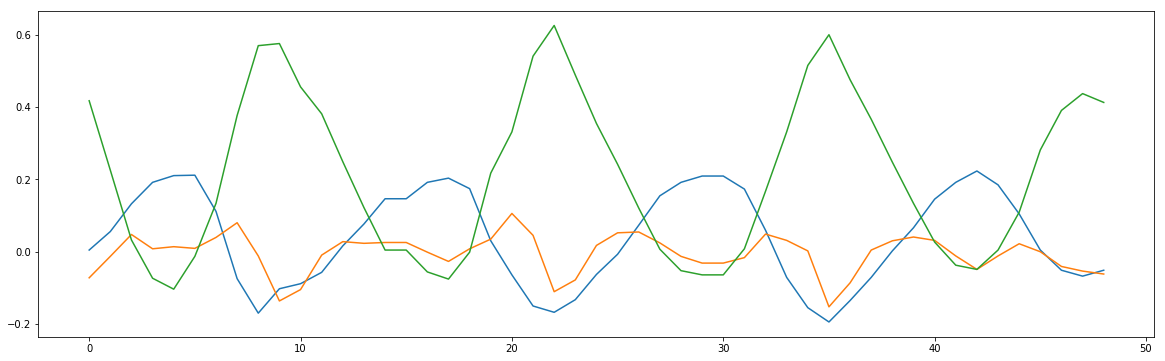

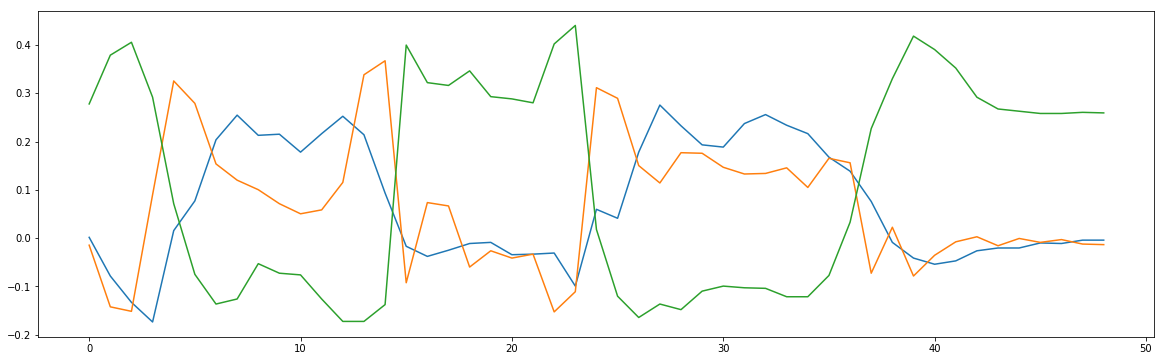

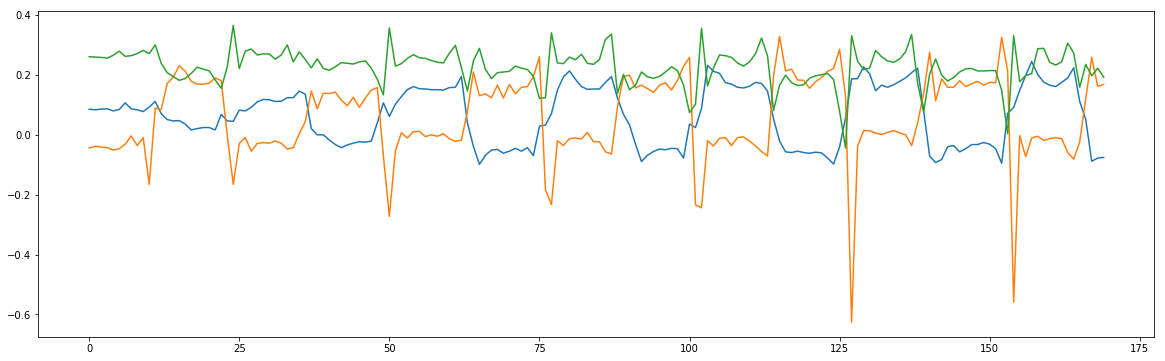

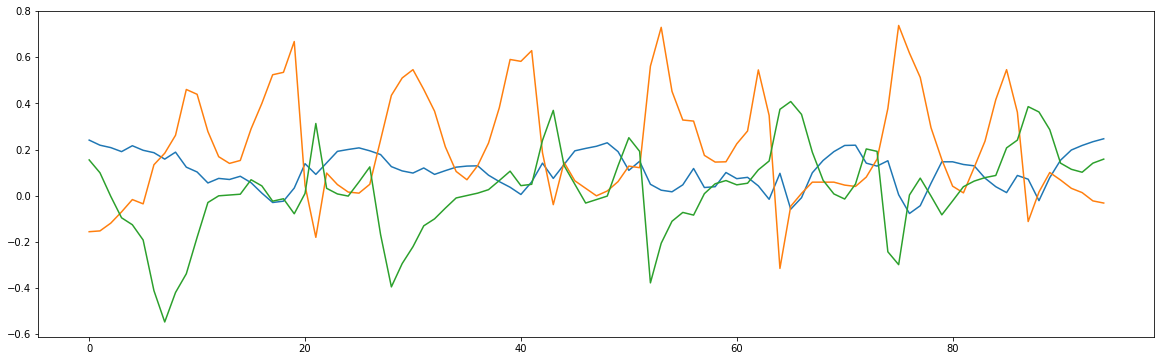

In [74]:
figsize(20,6)
for i in arange(gestures.shape[0]):
    figure(i)
    plot(gestures[i])

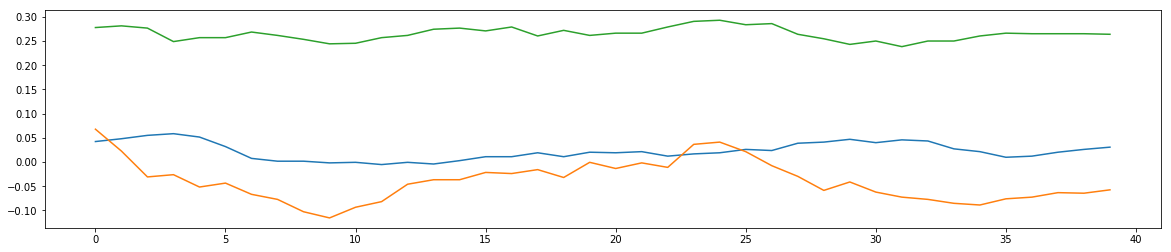

In [46]:
g = gestures[0]
figsize(20,4)
plot(g)

In [60]:
q=np.random.random((3,3))
print(q)
q2 = np.random.random((3,1))
print(q2)
np.append(q,q2, axis=1)

[[ 0.88821707  0.26591151  0.41162665]
 [ 0.86495841  0.1025334   0.43186892]
 [ 0.78806868  0.01385472  0.45274493]]
[[ 0.44423483]
 [ 0.67391654]
 [ 0.6015339 ]]


array([[ 0.88821707,  0.26591151,  0.41162665,  0.44423483],
       [ 0.86495841,  0.1025334 ,  0.43186892,  0.67391654],
       [ 0.78806868,  0.01385472,  0.45274493,  0.6015339 ]])

In [75]:
for i_g in range(gestures.shape[0]):
    gestures[i_g] = np.append(gestures[i_g], vstack((argmax(gestures[i_g], axis=1) / 2) - 0.5), axis=1)

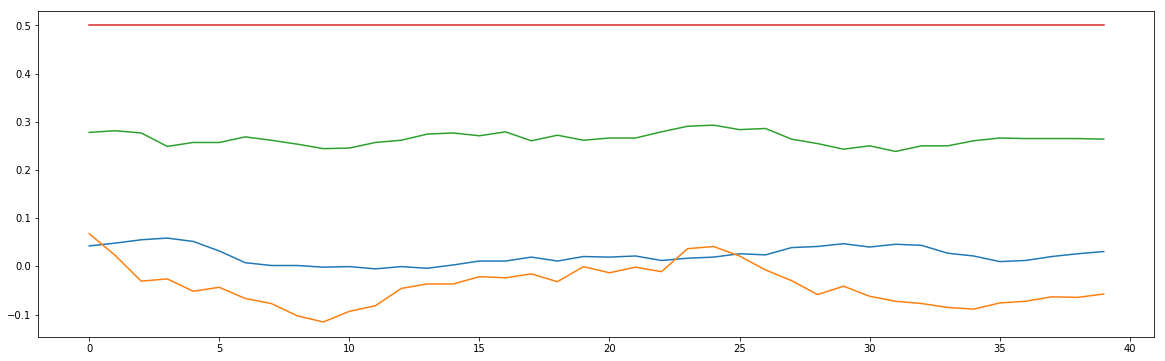

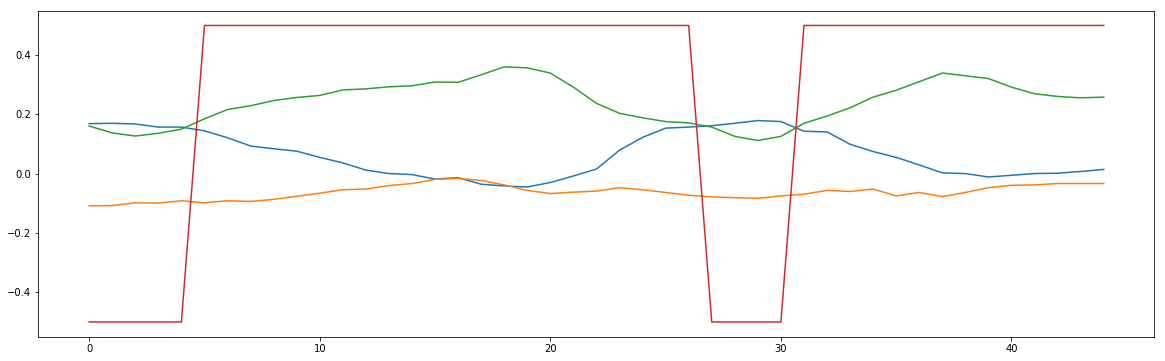

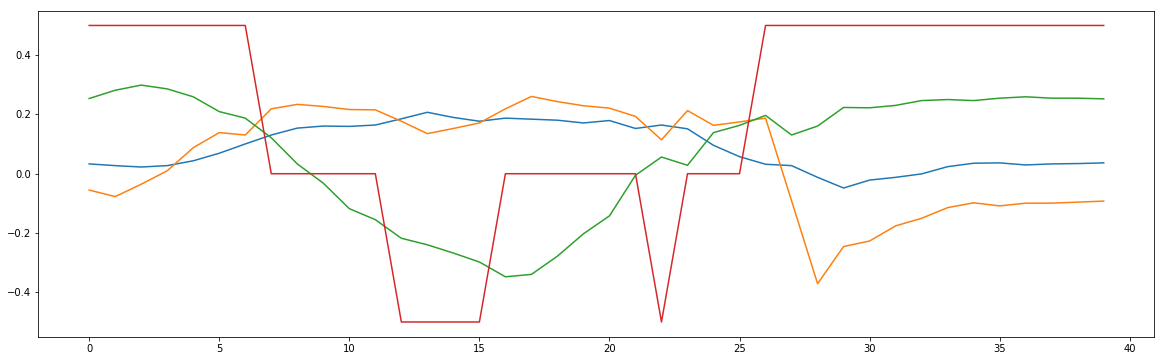

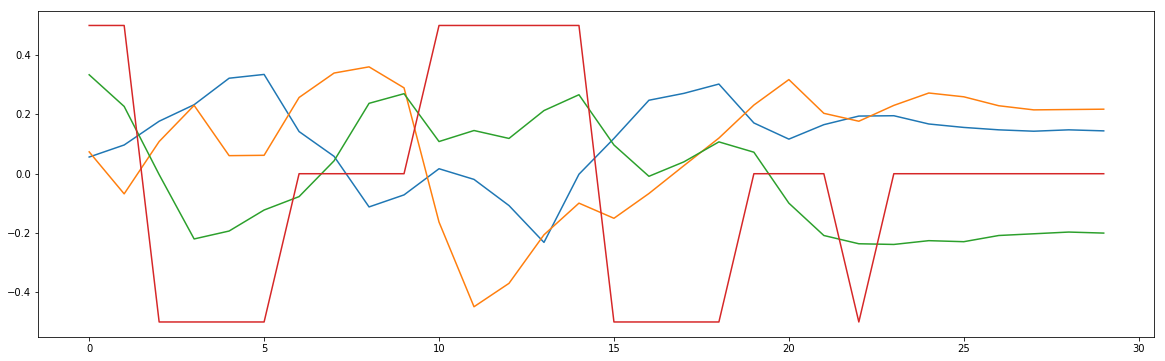

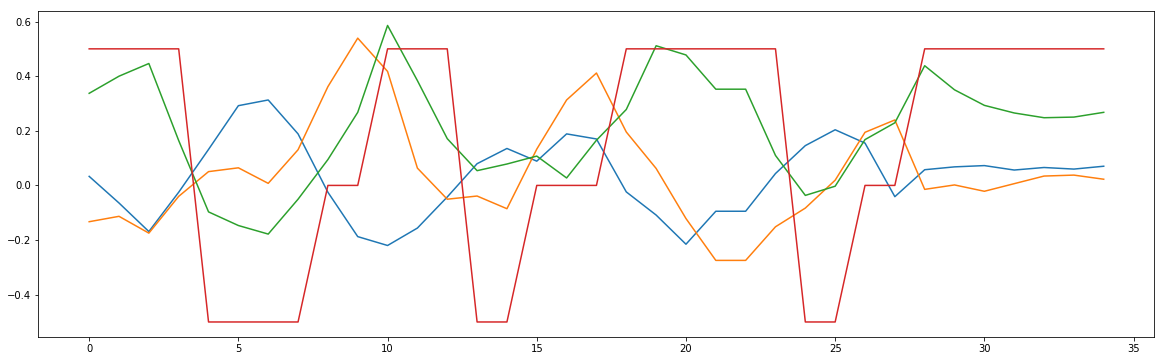

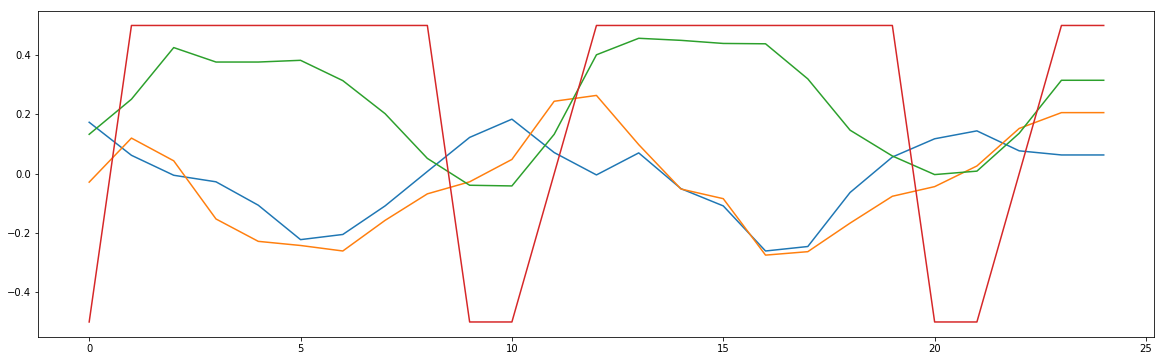

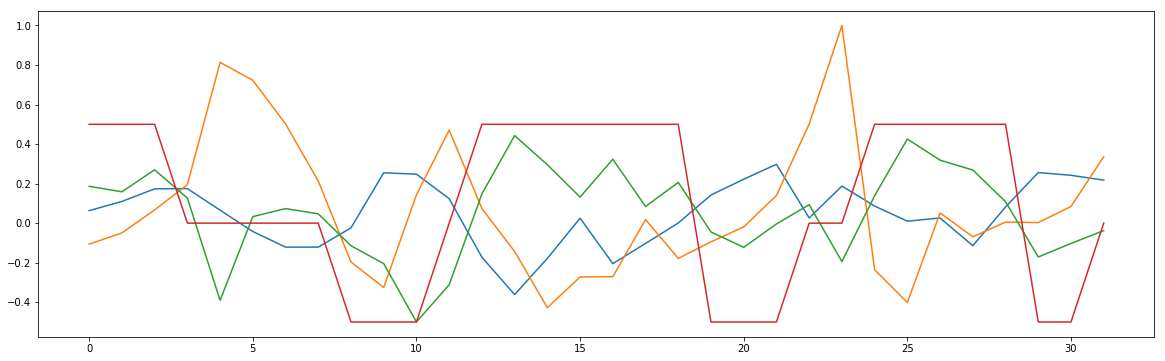

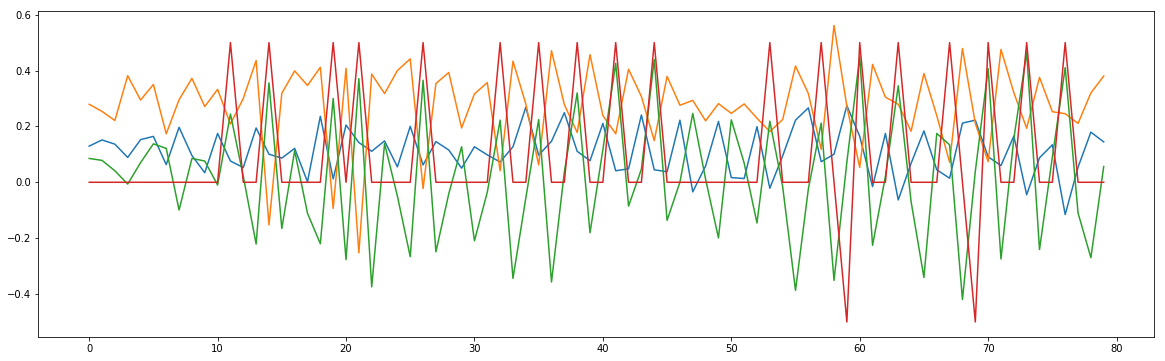

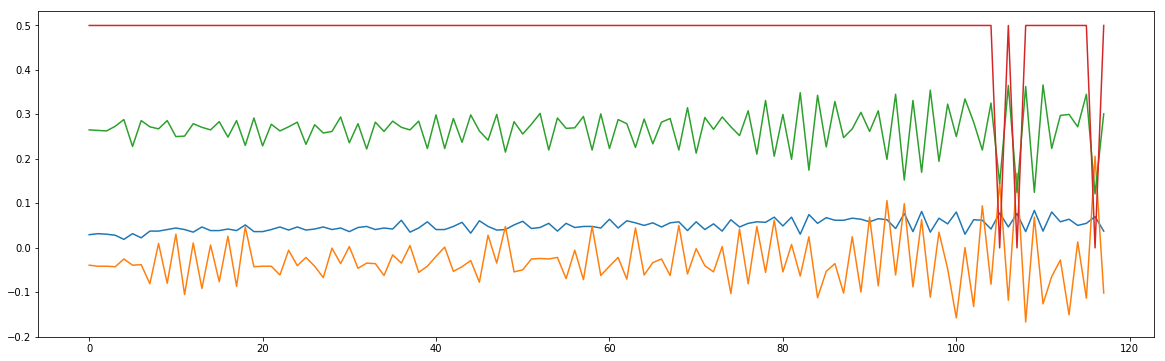

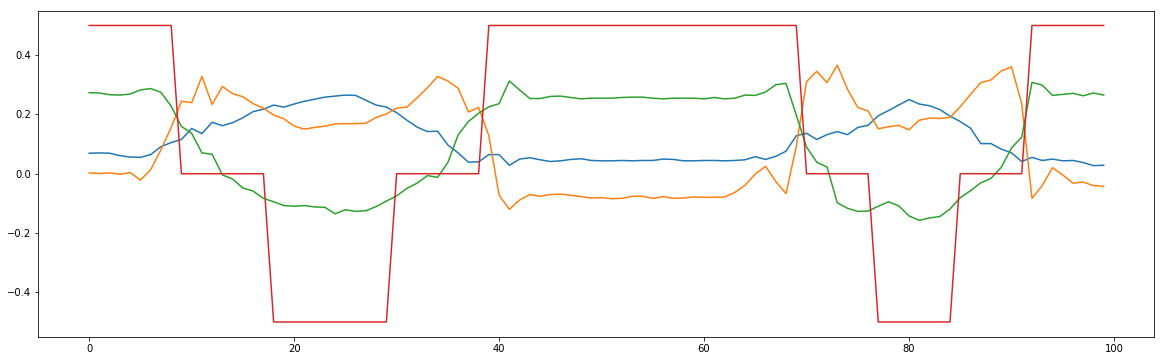

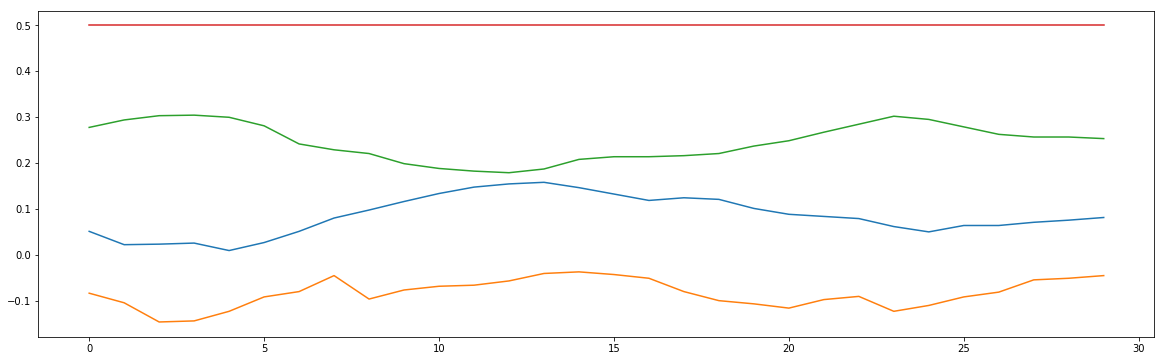

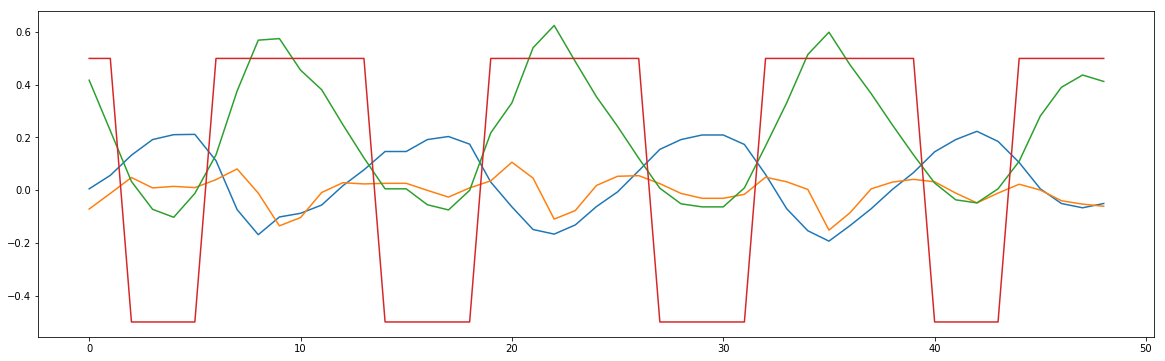

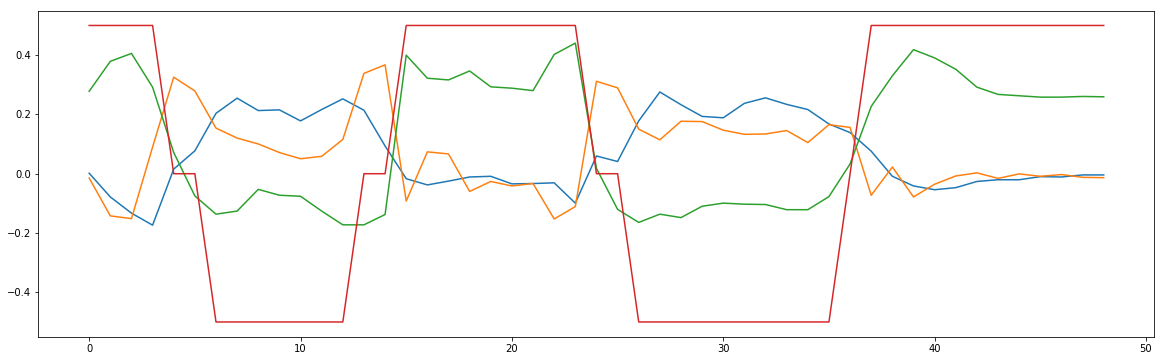

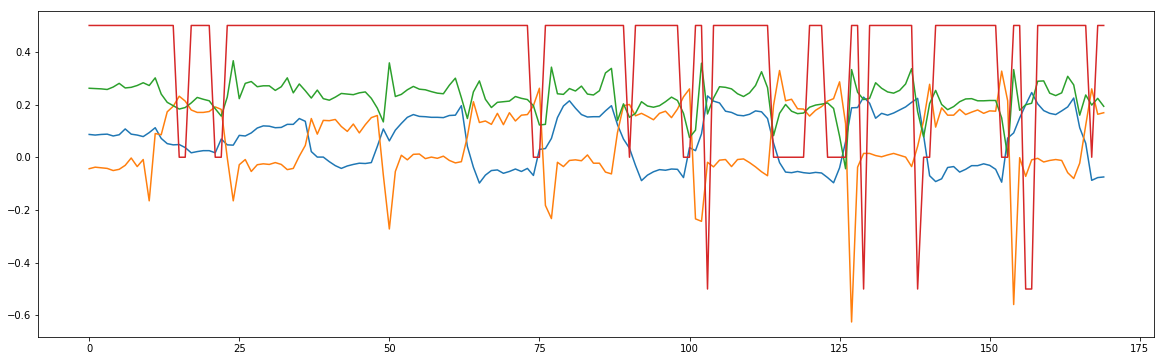

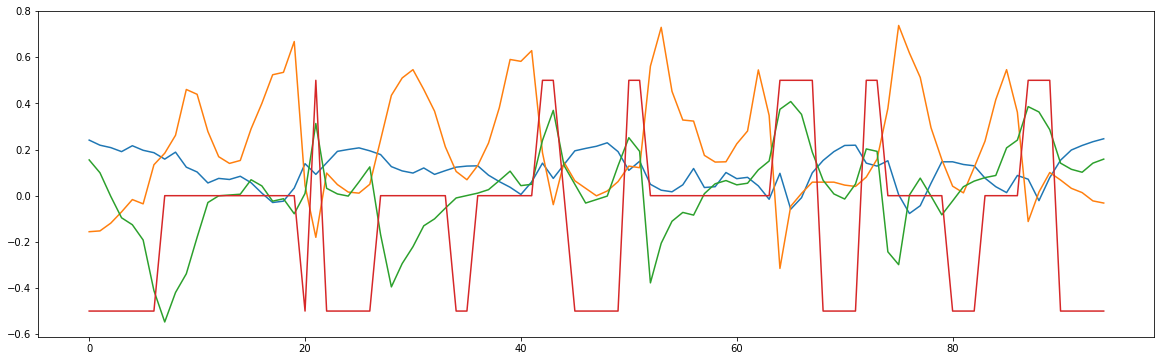

In [76]:
figsize(20,6)
for i in arange(gestures.shape[0]):
    figure(i)
    plot(gestures[i])

In [10]:
def generateInternalWeights(nInternalUnits, connectivity):
    success = False
    internalWeights = 0
    while success == False:
        try:
            internalWeights = np.random.randn(nInternalUnits,nInternalUnits) * (np.random.random((nInternalUnits,nInternalUnits)) < connectivity)
#             internalWeights = tanh(internalWeights * 1000) #push weights to 1 or -1
            specRad = abs(np.linalg.eig(internalWeights)[0][0])
            if (specRad > 0):
                internalWeights = internalWeights / specRad
                success = True
        except e:
            print(e)
    return internalWeights

In [11]:
a = -0.5
1 if a > 0 else -1 if a < 0 else 0

-1

In [12]:
mt = np.random.randn(3,3)
print(mt)
mt = tanh(mt * 1000)
print(mt)

[[-1.73332306  0.50554481  0.54485874]
 [-0.67023765 -0.19507393 -1.98995647]
 [ 1.62652301  0.24148243 -0.8587544 ]]
[[-1.  1.  1.]
 [-1. -1. -1.]
 [ 1.  1. -1.]]


In [87]:

def makeClassifierNetwork(p):
    Netconnectivity = 1
    if p['N'] > 20:
        Netconnectivity = 10.0/p['N'];
    WstarRaw = generateInternalWeights(p['N'], Netconnectivity)
    WinRaw = 2 * (np.random.rand(p['N'], p['NIns']) - 0.5) *  (np.random.random((p['N'], p['NIns'])) < 0.1)
    WbiasRaw = 2 * (np.random.rand(p['N'], 1) - 0.5)

    #Scale raw weights     
    Wstar = p['NetSR'] * WstarRaw;
    W = Wstar
    Win = p['NetinpScaling'] * WinRaw;
    Wbias = p['BiasScaling'] * WbiasRaw;  
    I = np.eye(p['N'])
    xCollector = np.zeros((p['N'], p['learnLength']))
    pCollector = np.zeros((3, p['learnLength']))
    x = np.zeros((p['N'],1))
    
    allTrainxArgs = np.zeros((p['N'] + 1, 0));
#     allTrainOldxArgs = np.zeros((p['N'], 0));
#     allTrainWtargets = np.zeros((p['N'], 0));
#     allTrainOuts = np.zeros((3, 0));
    patternRs =  np.zeros((1, p['patts'].size), dtype=np.object)
    
    for i_pattern in range(p['patts'].size):
        print('Observing pattern ', i_pattern)
        patt = p['patts'][i_pattern]
        xCollector = np.zeros((p['N'] + 1, p['learnLength']));
        xOldCollector = np.zeros((p['N'], p['learnLength']));
        WTargetCollector = np.zeros((p['N'], p['learnLength']));
#         pCollector = np.zeros((3, p['learnLength']));
        x = np.zeros((p['N'], 1));

        for n in range(p['washoutLength'] + p['learnLength']):
            u = patt.take(n, mode='wrap', axis=0)
            xOld = x
            Wtarget = (Wstar.dot(x)) + vstack(Win.dot(u))
            x = ((1.0-p['LR']) * xOld) + (p['LR'] * tanh(Wtarget + Wbias))
            if n >= p['washoutLength']:
                xCollector[:, n - p['washoutLength']] = np.concatenate((x[:,0], np.array([1])))
#                 xOldCollector[:, n - p['washoutLength']] = xOld[:,0]
#                 WTargetCollector[:, n - p['washoutLength']] = Wtarget[:,0]
#                 pCollector[:, n - p['washoutLength']] = u
            uOld = u
        
        R = xCollector[0:-1].dot(xCollector[0:-1].T) / p['learnLength']
        patternRs[0,i_pattern] = R
        allTrainxArgs = np.concatenate((allTrainxArgs, xCollector), axis=1)
#         allTrainOldxArgs = np.concatenate((allTrainOldxArgs, xOldCollector), axis=1)
#         allTrainOuts = np.concatenate((allTrainOuts, pCollector), axis=1)
#         allTrainWtargets = np.concatenate((allTrainWtargets, WTargetCollector), axis=1)
        print("Done")

    return locals()

params = {'N':500, 'NetSR':1.5, 'NetinpScaling':1.3,'BiasScaling':0.9,
         'washoutLength':200, 'learnLength':1000, 
          'LR': 0.9, "NIns": 4,
          'patts':gestures[[0,1,2,4,5,6]]
         }

net = makeClassifierNetwork(params)
print("Done")
cellbell.ding()


Observing pattern  0
Done
Observing pattern  1
Done
Observing pattern  2
Done
Observing pattern  3
Done
Observing pattern  4
Done
Observing pattern  5
Done
Done


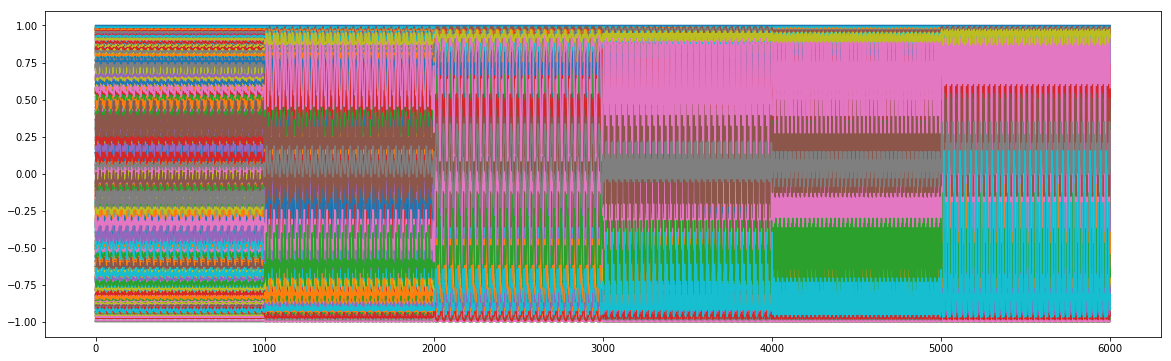

In [88]:
figsize(20,6)
plot(net['allTrainxArgs'].T[:])
None

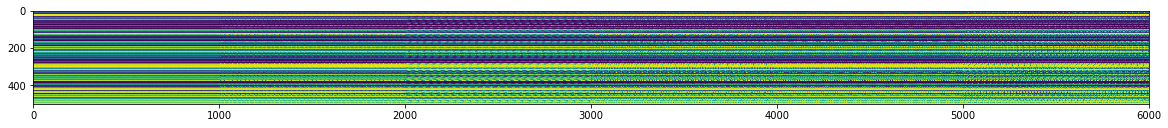

In [89]:
imshow(net['allTrainxArgs'])

In [90]:
def computeConceptor(p, net, i_pattern, alpha):
#     print('Computing conceptor, alpha: ', alpha)
    Cs = np.zeros((4, 1), dtype=np.object)
    R = net['patternRs'][0,i_pattern]
    [U,s,V] = svd(R)
    S = diag(s)
    Snew = (S * linalg.inv(S + pow(alpha, -2) * np.eye(p['N'])))

    C =  U.dot(Snew).dot(U.conj().T);
    Cs[0,0] = C
    Cs[1,0] = U
    Cs[2,0] = diag(Snew)
    Cs[3,0] = diag(S)

    return Cs

def testConceptor(net, cNet, recallTestLength):
    trials = 1
    attens = np.zeros(trials)
    p = net['p']
    C = cNet[0,0]
    for i_trial in range(trials):
        x_CTestPL = np.zeros((p['N'], recallTestLength))
        z_CTestPL = np.zeros((p['N'], recallTestLength))
#         p_CTestPL = np.zeros((1, recallTestLength))
        x = 0.5 * np.random.randn(p['N'],1)
        z = x
        for n in range(recallTestLength + p['washoutLength']):
            xOld = x
            Wtarget = (net['W'].dot(x))
            z = ((1.0-p['LR']) * xOld) + (p['LR'] * tanh(Wtarget + net['Wbias']))
            x = C.dot(z)
            xPrev = x
            if (n > p['washoutLength']):
                x_CTestPL[:,n-p['washoutLength']] = x.T
                z_CTestPL[:,n-p['washoutLength']] = z.T
#                 p_CTestPL[:,n-p['washoutLength']] = cNet['net']['Wout'].dot(np.concatenate((x[:,0], np.array([1]))))

#         attenuation = np.mean(pow(np.sum(z_CTestPL[:,:] - x_CTestPL[:,:], axis=1),2)) / np.mean(pow(np.sum(z_CTestPL[:,:], axis=1),2))
        attenuation = np.mean(pow(np.linalg.norm(z_CTestPL[:,:] - x_CTestPL[:,:], axis=1),2)) / np.mean(pow(np.linalg.norm(z_CTestPL[:,:], axis=1),2))
        attens[i_trial] = attenuation
        
    return np.mean(attens)

def fitnessf(aperture, *args):
    print('Pattern: ', args[0])
    cnet = computeConceptor(net['p'], net, args[0], aperture)
    atten = testConceptor(net, cnet, 300)
    return atten

In [91]:
import scipy.optimize
apertures = [sp.optimize.fminbound(fitnessf, 0,1000,  disp=3, xtol=1, args = (x,)) 
             for x in np.arange(net['p']['patts'].shape[0])]

#store conceptors with calculated apertures
patternCs = np.zeros(len(apertures), dtype=np.object)
for i_patt in range(patternCs.size):
    patternCs[i_patt] = computeConceptor(net['p'], net, i_patt, apertures[i_patt])
cellbell.ding()

Pattern:  0
 
 Func-count     x          f(x)          Procedure
    1        381.966     0.010805        initial
Pattern:  0
    2        618.034    0.0107816        golden
Pattern:  0
    3        763.932    0.0107908        golden
Pattern:  0
    4        616.913    0.0107816        parabolic
Pattern:  0
    5        569.036    0.0107811        parabolic
Pattern:  0
    6        497.582     0.010784        golden
Pattern:  0
    7        571.428     0.010781        parabolic
Pattern:  0
    8        577.552     0.010781        parabolic
Pattern:  0
    9        576.524     0.010781        parabolic
Pattern:  0
   10        575.805     0.010781        parabolic
Pattern:  0
   11        576.858     0.010781        parabolic
Pattern:  0
   12        576.191     0.010781        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1 )
Pattern:  1
 
 Func-count     x          f(x)          Procedure
    1        381.966   0.004

In [92]:
apertures

[576.52439169989509,
 14.473420350109077,
 3.1056200151418611,
 5.5386777606456423,
 5.579116801002959,
 1.9193787254996335]

In [93]:
import scipy.spatial.distance as dist


def plotConceptorPatterns(net, cNet, recallTestLength):
    #calc negative evidence
    def conceptorOr(C,B):
        I = np.eye(C.shape[0])
        return linalg.inv(I + linalg.inv(C.dot(linalg.inv(1.0-C)) + B.dot(linalg.inv(1.0-B))))
    patternCsNeg = np.zeros(len(apertures), dtype=np.object)

    for i_c in arange(net['p']['patts'].size):
        idxs = np.delete(arange(net['p']['patts'].size), i_c)
        Cneg = conceptorOr(patternCs[idxs[0]][0,0], patternCs[idxs[1]][0,0])
        for i_idx in idxs[2:]:
            Cneg = conceptorOr(Cneg, patternCs[i_idx][0,0])
        Cneg = 1.0 - Cneg
        patternCsNeg[i_c] = Cneg

#     x_CTestPL = np.zeros((3, recallTestLength, p['patts'].size))
#     p_CTestPL = np.zeros((1, recallTestLength, p['patts'].size))
    cx_CTestPL = np.zeros((net['p']['patts'].size+1,recallTestLength))
    pat_CTestPL = np.zeros((net['p']['NIns'],recallTestLength))
    
    CNone = conceptorOr(patternCs[0][0,0], patternCs[1][0,0])
    for i_idx in arange(net['p']['patts'].size)[2:]:
        CNone = conceptorOr(CNone, patternCs[i_idx][0,0])
    CNone = 1.0 - CNone
    
    
    
    for i_pattern in range(net['p']['patts'].size):
        patt = net['p']['patts'][i_pattern]
        x = np.zeros((net['p']['N'],1))
        for n in range(recallTestLength + net['p']['washoutLength']):
            u = patt.take(n, mode='wrap', axis=0)
            xOld = x
            Wtarget = (net['Wstar'].dot(x)) + vstack((net['Win'].dot(u)))
            x = ((1.0-net['p']['LR']) * xOld) + (net['p']['LR'] * tanh(Wtarget + net['Wbias']))
            if (n > net['p']['washoutLength']):
                pat_CTestPL[:,n-net['p']['washoutLength'] ] = u
                
                for i_ev in range(net['p']['patts'].size):
                    C = patternCs[i_ev][0,0]
                    C2 = patternCsNeg[i_ev]
                    cx = x.T.dot(C.dot(x))
                    cx2 = x.T.dot(C2.dot(x))
                    cx_CTestPL[i_ev,n-net['p']['washoutLength']] = cx + cx2
                cxNone = x.T.dot(CNone.dot(x))
                cx_CTestPL[-1,n-net['p']['washoutLength']] = cxNone
                    

        ax = subplot(net['p']['patts'].size * 2, 2, i_pattern*2 + 1)
#         ax.set_title("Sample " + str(suboff/2) + ", pattern: " + str(i_pattern) )
#         plot([p['patts'][i_pattern](x) for x in arange(recallTestLength)])
        plot(pat_CTestPL.T)
        ax = subplot(net['p']['patts'].size * 2, 2, i_pattern*2 + 2)
        for i_plot in range(net['p']['patts'].size):
            plot(cx_CTestPL[i_plot,1:].T, label=i_plot, alpha=0.8)
#         plot(cx_CTestPL[-1,1:].T, label="None", alpha=0.8)
        ax.legend()
        classificationScore = np.sum(cx_CTestPL[i_pattern] ==  np.max(cx_CTestPL, axis=0)) / cx_CTestPL[0].size
        otherResponses = cx_CTestPL[[x for x in arange(net['p']['patts'].size) if x != i_pattern]]
        otherResponsesRange = dist.euclidean(np.max(otherResponses, axis=0),np.min(otherResponses, axis=0))
        separation = dist.euclidean(cx_CTestPL[i_pattern],np.max(otherResponses, axis=0)) / otherResponsesRange
        print("Pattern ", str(i_pattern), " classification score: ", classificationScore, ", separation: ", separation)
        #testing

    return locals()


Pattern  0  classification score:  1.0 , separation:  0.19615697811865784
Pattern  1  classification score:  1.0 , separation:  0.31916019886937996
Pattern  2  classification score:  1.0 , separation:  0.41768256379344354
Pattern  3  classification score:  1.0 , separation:  0.5681418490267002
Pattern  4  classification score:  1.0 , separation:  0.24020156726235325
Pattern  5  classification score:  1.0 , separation:  0.6091251053098966


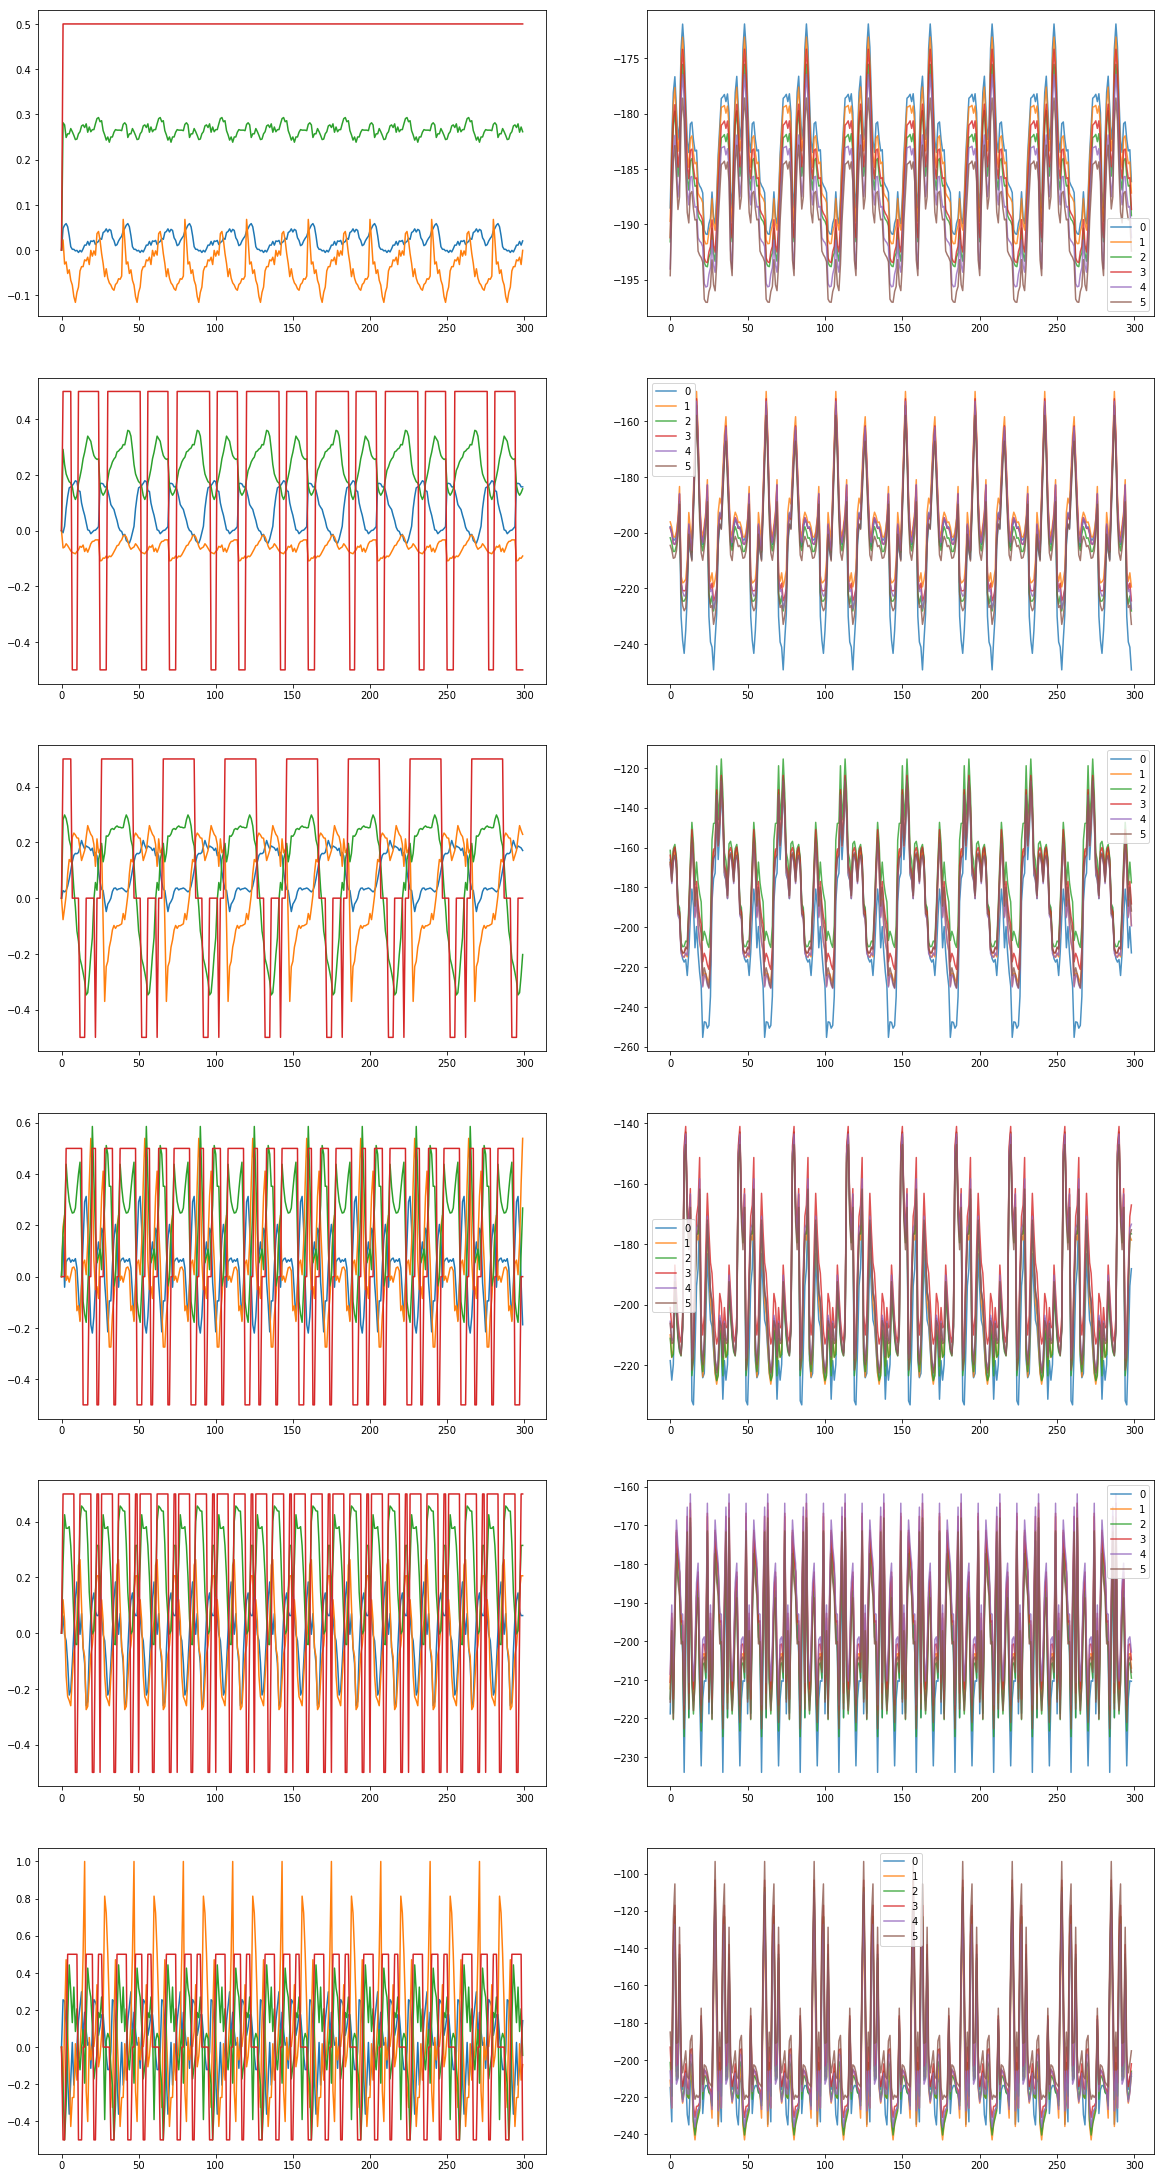

In [94]:
figsize(20,80)
plotConceptorPatterns(net, patternCs, 300)
#for each row, the highest line should match the row index
None

In [1]:
figsize(500,500)
imshow(net["W"])

NameError: name 'figsize' is not defined

In [125]:
#runtime

def generateClassificationConceptors(net, cNet):
    #calc negative evidence
    def conceptorOr(C,B):
        I = np.eye(C.shape[0])
        return linalg.inv(I + linalg.inv(C.dot(linalg.inv(1.0-C)) + B.dot(linalg.inv(1.0-B))))
    patternCsNeg = np.zeros(len(apertures), dtype=np.object)

    for i_c in arange(net['p']['patts'].size):
        idxs = np.delete(arange(net['p']['patts'].size), i_c)
        Cneg = conceptorOr(patternCs[idxs[0]][0,0], patternCs[idxs[1]][0,0])
        for i_idx in idxs[2:]:
            Cneg = conceptorOr(Cneg, patternCs[i_idx][0,0])
        Cneg = 1.0 - Cneg
        patternCsNeg[i_c] = Cneg

    CNone = conceptorOr(patternCs[0][0,0], patternCs[1][0,0])
    for i_idx in arange(net['p']['patts'].size)[2:]:
        CNone = conceptorOr(CNone, patternCs[i_idx][0,0])
    CNone = 1.0 - CNone
    
    return {'negatives':patternCsNeg, 'none':CNone}

def iterate(net, Cs, classifierCs, u):
    result = np.zeros(net['p']['patts'].size+1)
    net['xOld'] = net['x']
    Wtarget = (net['Wstar'].dot(net['x'])) + vstack((net['Win'].dot(u)))
    net['x'] = ((1.0-net['p']['LR']) * net['xOld']) + (net['p']['LR'] * tanh(Wtarget + net['Wbias']))
    for i_ev in range(net['p']['patts'].size):
        C = Cs[i_ev][0,0]
        C2 = classifierCs['negatives'][i_ev]
        cx = net['x'].T.dot(C.dot(net['x']))
        cx2 = net['x'].T.dot(C2.dot(net['x']))
        result[i_ev] = cx + cx2
    cxNone = net['x'].T.dot(classifierCs['none'].dot(net['x']))
    result[-1] = cxNone
    return result

    
    
net['x'] = np.zeros((net['p']['N'],1))
classifierConceptors = generateClassificationConceptors(net, patternCs)


In [132]:
testOutput = np.zeros((4,1000))
for i in range(testOutput.shape[1]):
    testOutput[:,i] = iterate(net, patternCs, classifierConceptors, net['p']['patts'][0].take(i, mode='wrap', axis=0))


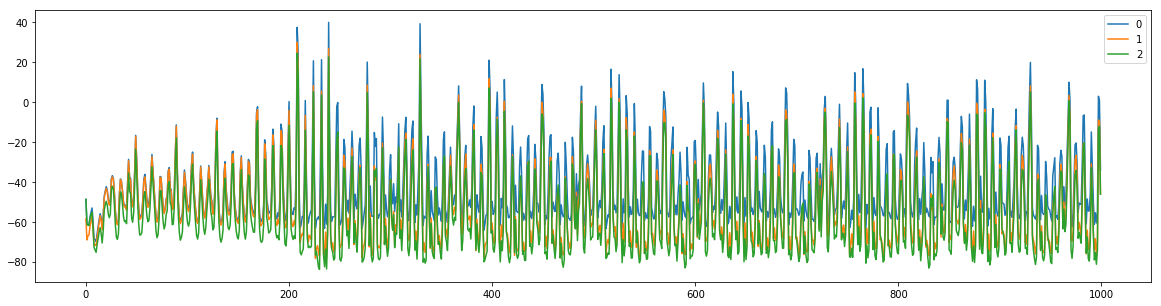

In [133]:
figsize(20,5)
testOutput
for i in range(testOutput.shape[0]-1):
    plot(testOutput[i], label=i)
plt.legend()

In [14]:
gestures = np.zeros(3, dtype=np.object)

In [36]:
newGesture = np.zeros(0)
newGesture

array([], dtype=float64)

In [43]:
newGesture = np.append(newGesture, np.random.random(3))


In [44]:
newGesture

array([ 0.29066141,  0.83286177,  0.37242975,  0.88224656,  0.12446012,
        0.37083575,  0.38132192,  0.59613   ,  0.16389848,  0.00376927,
        0.88998514,  0.37119502])

In [45]:
newGesture = newGesture.reshape(int(newGesture.shape[0]/3),3)

In [46]:
newGesture

array([[ 0.29066141,  0.83286177,  0.37242975],
       [ 0.88224656,  0.12446012,  0.37083575],
       [ 0.38132192,  0.59613   ,  0.16389848],
       [ 0.00376927,  0.88998514,  0.37119502]])

In [47]:
gestures[0]=newGesture

In [48]:
gestures

array([ array([[ 0.29066141,  0.83286177,  0.37242975],
       [ 0.88224656,  0.12446012,  0.37083575],
       [ 0.38132192,  0.59613   ,  0.16389848],
       [ 0.00376927,  0.88998514,  0.37119502]]),
       0, 0], dtype=object)

In [60]:
g = gestures

In [65]:
h = np.concatenate((g,g), axis=0)

In [108]:
[np.min(gestures[x][:,0:3]) for x in arange(4)]

[-0.11549632289394723,
 -0.10853172478004898,
 -0.37086492040253777,
 -0.44863612432962929]

In [70]:
r = np.random.random((3,3))

In [75]:
np.concatenate((r,r),axis=1)

array([[ 0.76033542,  0.52687927,  0.38297457,  0.76033542,  0.52687927,
         0.38297457],
       [ 0.76459008,  0.0774905 ,  0.71080151,  0.76459008,  0.0774905 ,
         0.71080151],
       [ 0.81485128,  0.83080269,  0.94860591,  0.81485128,  0.83080269,
         0.94860591]])